# Decision Tree  

## Konsep Decision Tree  
Decision tree adalah metode dalam machine learning yang digunakan untuk klasifikasi atau regresi, dengan memodelkan proses pengambilan keputusan dalam bentuk struktur pohon. Setiap simpul pada pohon merepresentasikan pengujian terhadap atribut, sedangkan cabang menunjukkan hasil dari pengujian tersebut. Model ini membagi data secara rekursif berdasarkan kriteria seperti information gain atau Gini index, hingga mencapai keputusan akhir di simpul daun. Decision tree mudah diinterpretasikan, namun rentan terhadap overfitting pada data yang kompleks.  

### Partisi Data
Dalam algoritma decision tree, kita membagi dataset berdasarkan fitur tertentu agar dapat membuat keputusan klasifikasi yang lebih baik dengan  memisahkan data menjadi dua kelompok berdasarkan fitur tertentu yang paling informatif (misalnya yang memberi information gain terbesar).  

Rumus :  
$$\begin{align}
\mathbf{D_Y} &= \left\{ \mathbf{x}^T \mid \mathbf{x} \in \mathbf{D},\ x_j \leq v \right\} \\
\mathbf{D_N} &= \left\{ \mathbf{x}^T \mid \mathbf{x} \in \mathbf{D},\ x_j > v \right\}
\end{align}
$$  

Penjelasan :  
* $D$ : dataset awal.  
* $x_{j}$ : nilai fitur ke-j dari satu sampel data.  
* $v$ : nilai ambang batas (threshold) untuk memisahkan data.  
* $D_{Y}$ : subset data di mana nilai fitur ke-j kurang dari atau sama dengan 𝑣.  
* $D_{N}$ : subset data di mana nilai fitur ke-j lebih besar dari 𝑣.  

### Kebenaran (Purity)  
Purity merupakan ukuran yang menunjukkan seberapa homogen suatu subset data dalam sebuah simpul (node) decision tree berdasarkan label kelasnya.

Purity dihitung sebagai proporsi data dalam sebuah simpul yang berasal dari kelas mayoritas. Artinya, semakin banyak data dalam simpul yang berasal dari satu kelas yang sama, semakin tinggi nilai purity-nya.  

Rumus:  
$$\text{purity}(\mathbf{D}_j) = \max_i \left\{ \frac{n_{ji}}{n_j} \right\}$$  

Penjelasan :  
* $n_{j}$ : jumlah total data pada simpul 𝑗.  
* $n_{ji}$ : jumlah data pada simpul 𝑗 yang memiliki label kelas $c_{i}$  
* $max_{i}$ : memilih proporsi tertinggi dari semua kelas yang ada.  

✅ Nilai purity berkisar antara 0 hingga 1.  
✅ Jika purity = 1, maka semua data pada simpul berasal dari satu kelas (sangat murni).  
✅ Jika purity < 1, maka data terdiri dari campuran beberapa kelas.  

### Entropy  
Entropi adalah ukuran ketidakpastian atau ketidakteraturan dalam kumpulan data. Dalam decision tree, entropi digunakan untuk mengukur seberapa “murni” sebuah node (daerah).  
Rumus :  
$$H(\mathbf{D}) = - \sum_{i=1}^{k} P(c_i \mid \mathbf{D}) \log P(c_i \mid \mathbf{D})$$  

Penjelasan :  
* $D$ : himpunan data berlabel  
* $c_{i}$ : label kelas ke-𝑖.  
* $k$ : jumlah kelas.  
* $P(c_{i}|D)$ : probabilitas data dalam 𝐷 memiliki kelas $c_{i}$.  

📌 Entropi = 0, maka Semua data dalam 𝐷 berasal dari satu kelas (murni).  
📌 Jika distribusi kelas tidak merata tapi tidak murni, maka entropi bernilai di antara 0 dan log 𝑘.  
📌 Entropi maksimum = log 𝑘, maka Data terdistribusi merata ke semua kelas (paling tidak murni). Misal 𝑘=2, maka maksimum entropi adalah log 2 = 1.  

### Split entropy  
Split Entropy digunakan untuk mengukur seberapa baik suatu titik split (pembagian data) dalam decision tree memisahkan data berdasarkan target class-nya. Jika pembagian menghasilkan subset yang "murni" (pure)—yaitu entropi rendah—maka split entropy juga akan rendah.  

Rumus :  
$$H(\mathbf{D_Y}, \mathbf{D_N}) = \frac{n_Y}{n} H(\mathbf{D_Y}) + \frac{n_N}{n} H(\mathbf{D_N})$$  

Penjelasan :  
* $D_{Y}, D_{N}$ : Dua subset data hasil dari pembagian (split) data 𝐷.  
* $n$ : Jumlah total data (jumlah sampel) sebelum split.  
* $n_{Y}$ : Jumlah data di subset $D_{Y}$.  
* $n_{N}$ : Jumlah data di subset $D_{N}$.  
* $H(D_{Y})$ :  Entropi dari subset $D_{Y}$  
* $H(D_{N})$ :  Entropi dari subset $D_{N}$  

### Information gain
nformation Gain mengukur seberapa besar penurunan ketidakpastian (entropi) setelah data dipisahkan berdasarkan suatu atribut.  
* Gain tinggi → pemisahan menghasilkan subset yang lebih "murni" (homogen).  
* Gain rendah → subset tetap campur aduk (entropi tidak berkurang banyak).  

Rumus :  
$$\text{Gain}(\mathbf{D}, \mathbf{D_Y}, \mathbf{D_N}) = H(\mathbf{D}) - H(\mathbf{D_Y}, \mathbf{D_N})
$$  

Penjelasan :  
* $H(D)$ : entropi dari data sebelum pemisahan.  
* $H(D_{Y}, D_{N})$ : entropi gabungan dari hasil pemisahan (dihitung sebagai rata-rata tertimbang dari entropi subset).


​ 


## Visualisasi partisi node

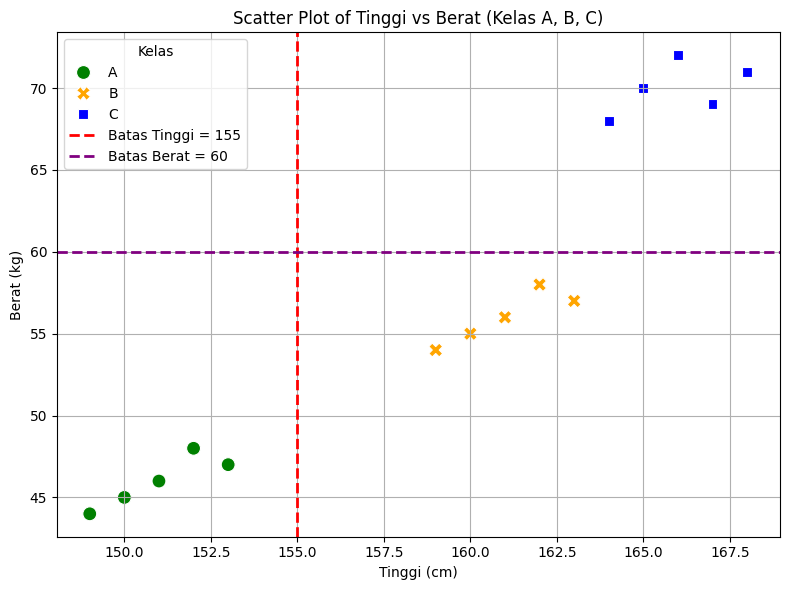

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
data = {
    'Tinggi': [150, 152, 151, 149, 153, 160, 162, 161, 163, 159, 165, 166, 164, 167, 168],
    'Berat':  [45, 48, 46, 44, 47,  55,  58,  56,  57,  54,  70, 72, 68, 69, 71],
    'Kelas':  ['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C']
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Tinggi',
    y='Berat',
    hue='Kelas',
    style='Kelas',
    palette={'A': 'green', 'B': 'orange', 'C': 'blue'},
    s=100
)

# Tambahkan garis batas manual (contoh threshold tinggi = 165)
plt.axvline(x=155, color='red', linestyle='--', linewidth=2, label='Batas Tinggi = 155')
plt.axhline(y=60, color='purple', linestyle='--', linewidth=2, label='Batas Berat = 60')

# Label dan judul
plt.title('Scatter Plot of Tinggi vs Berat (Kelas A, B, C)')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')

# Legenda dan grid
plt.legend(title='Kelas')
plt.grid(True)
plt.tight_layout()
plt.show()


### Link Perhitungan Manual  
https://docs.google.com/spreadsheets/d/1V7AdKRyy5O3EvECjPgBsZLvf3iymD3EWt1rGO6YxENc/edit?usp=sharing  

![alt text](<tree.jpg>)  

Rules:  
1. R1 : jika x1 ≤ 155, maka kelasnya adalah c1 (A)  
2. R2 : jika x1 > 155 dan x2 ≤ 60, maka kelasnya adalah c2 (B)  
3. R3 : jika x1 > 155 dan x2 > 60, maka kelasnya adalah c3 (C) 

## Komputasi dengan library sklearn

Confusion Matrix:
[[1 0 0]
 [0 1 0]
 [0 0 1]]

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Data Baru 1: Tinggi = 154 cm, Berat = 50 kg -> Prediksi Kelas: A
Data Baru 2: Tinggi = 165 cm, Berat = 62 kg -> Prediksi Kelas: B


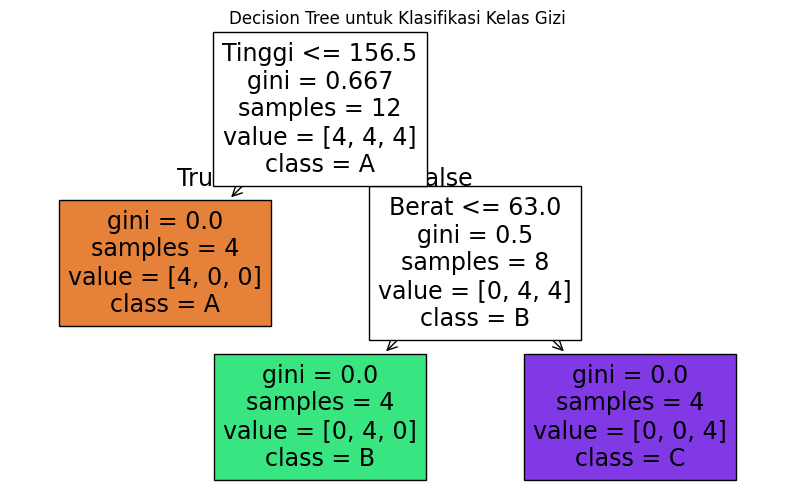

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Dataset
data = {
    'Tinggi': [150, 152, 151, 149, 153, 160, 162, 161, 163, 159, 165, 166, 164, 167, 168],
    'Berat':  [45,  48,  46,  44,  47,  55,  58,  56,  57,  54,  70,  72,  68,  69,  71],
    'Kelas':  ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}
df = pd.DataFrame(data)

# Fitur dan label
X = df[['Tinggi', 'Berat']]
y = df['Kelas']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Dua data baru yang ingin diklasifikasikan
data_baru = pd.DataFrame({
    'Tinggi': [154, 165],   # Data baru 1 dan 2
    'Berat': [50, 62]
})

# Prediksi kelas untuk data baru
prediksi = clf.predict(data_baru)

# Tampilkan hasil prediksi
for i, kelas in enumerate(prediksi, start=1):
    print(f"Data Baru {i}: Tinggi = {data_baru.iloc[i-1]['Tinggi']} cm, Berat = {data_baru.iloc[i-1]['Berat']} kg -> Prediksi Kelas: {kelas}")


# Visualisasi pohon keputusan
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['Tinggi', 'Berat'], class_names=clf.classes_, filled=True)
plt.title("Decision Tree untuk Klasifikasi Kelas Gizi")
plt.show()
